In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# 

# ON CHARGE NOTRE DATASET

In [118]:
house = pd.read_csv("kc_house_data.csv", sep=',')
house.head(5)
# ON charge notre dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [119]:
print("Notre dataset a ", house.shape[1], " colonnes et ",house.shape[0],"lignes")

Notre dataset a  21  colonnes et  21613 lignes


In [120]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [121]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [122]:
house.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

# On informe sur le type de variables 

In [123]:
house.dtypes 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# ON CONVERTIT LES DATES EN ANNEE 

In [124]:
house['date']=pd.to_datetime(house.date)
house['date'].head(10)


0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
5   2014-05-12
6   2014-06-27
7   2015-01-15
8   2015-04-15
9   2015-03-12
Name: date, dtype: datetime64[ns]

In [125]:
age_of_house = [house['date'][index].year - house['yr_built'][index] for index in range(house.shape[0])]

house['Age_House'] = age_of_house


In [126]:
maison_moins_Une_annee=house[house['Age_House'] < 0].shape[0] # On cherche le nombre des maisons qui moins d'une annee
print("Il y'a {} maisons de moins d'une annee".format(maison_moins_Une_annee))

Il y'a 12 maisons de moins d'une annee


In [127]:
#On cherche les maxmum , minimum et la moyenne de nombre d'annee de chaque maison

for i in house['Age_House'].agg({"min", "max", "mean"}).iloc:
    if  i< 0:
        print("Minimun",i)
    elif i>=0 and i< 45:
        print("Maximun",i)
    else:
        print("Moyenne",i)

    

Minimun -1.0
Maximun 43.31781797991949
Moyenne 115.0


In [128]:
house.describe().T# On la description de notre data set 

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# Nettoyage et verification 

In [129]:
# on verifie si'il ya des donnees manquantes 
if house.isnull().sum().iloc[1]  == 0 :
    print("Pas de donnees manquantes pour notre dataset")
else:
    print("Il y'a des donnees manquantes ")
    house.isnull().sum()


Pas de donnees manquantes pour notre dataset


In [130]:
(house.yr_renovated.value_counts(normalize = True)).head()

0       0.957711
2014    0.004210
2013    0.001712
2003    0.001666
2005    0.001619
Name: yr_renovated, dtype: float64

SELECTION DE DONNEES IMPORTANTES 

# VISUALISATION 

correlation entrer les annees de renouvation  et le prix de maison  est de  0.12643379344089312


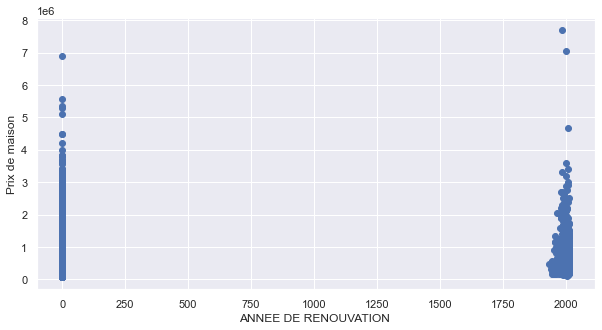

In [131]:
print("correlation entrer les annees de renouvation  et le prix de maison  est de  {}".format(house['yr_renovated'].corr(house['price'])))
plt.scatter(x = house.yr_renovated,y = house.price)
plt.xlabel("ANNEE DE RENOUVATION ")
plt.ylabel("Prix de maison")
plt.show()



1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64


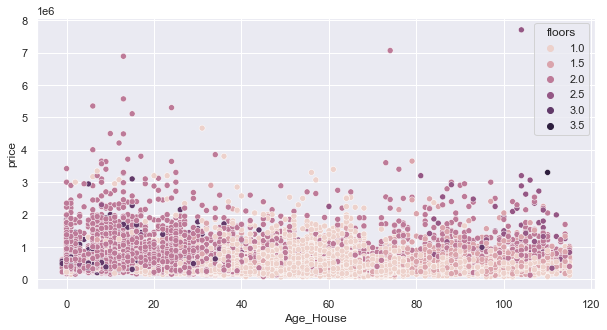

In [132]:
sns.set(rc ={"figure.figsize":(10,5)})
sns.scatterplot(data =house ,x = house['Age_House'], y = house['price'], hue = house["floors"])
print(house['floors'].value_counts())

# Pour cette presentation nous essayeons de voir le prix de maisons on fonctions de nbre de annees ainsi que leur types de so

On represente la repartion de prix 

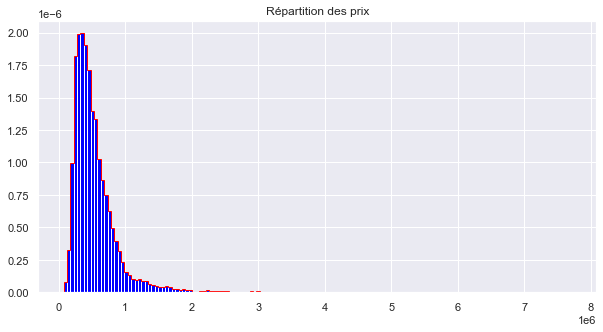

In [133]:
plt.figure(figsize =(10, 5))
plt.title('Répartition des prix')
plt.hist(house.price , bins =150 ,density =True, color='blue')
plt.hist(house.price , bins =150  ,density =True , histtype='step', color="Red" )
plt.show()

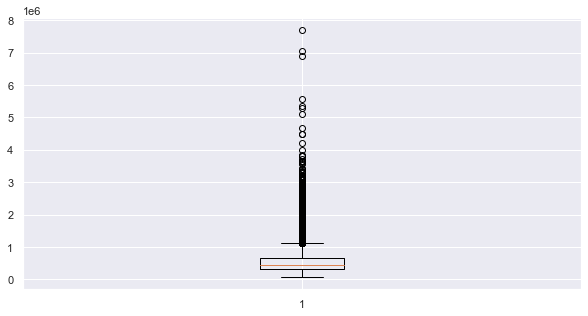

{'whiskers': [<matplotlib.lines.Line2D at 0x26724280160>,
 'caps': [<matplotlib.lines.Line2D at 0x267242805e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26724270e50>],
 'medians': [<matplotlib.lines.Line2D at 0x26724280b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x26724280e50>],
 'means': []}

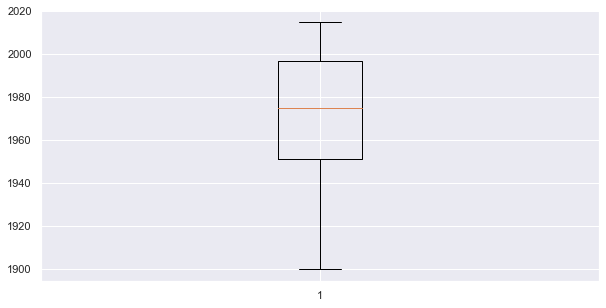

In [134]:
plt.boxplot(house.price)
plt.show()

plt.boxplot(house['yr_built'])

La carte de correlation de notre dataset


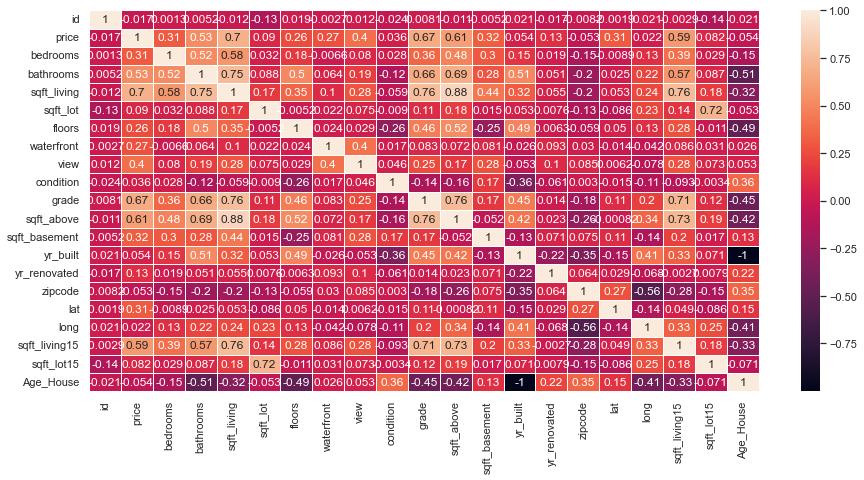

In [135]:
plt.figure(figsize =(15,7))
sns.heatmap(house.corr() , annot =True , linewidth =0.5)

print("La carte de correlation de notre dataset")

# SECLECTION DE DONNNES POUR NOTRE MODELE DE MACHINE LEARNING 

2) Pour notre datset nous allons notre toutes les donnees sauf le id et le dates car se sont qui sont utiles pour notre modele qui poue but
de determiner les prix de maison et si on utilse toutes nos donnees nous aura un probleme overfitting 
Notre nmodele aura un probleme de s'adapter au chagement des informations donc faut mieux eviter cela 


In [136]:
house.drop("date",axis =1 , inplace =True)



3. Divisez votre ensemble de données en un ensemble d'apprentissage et un ensemble de test.

In [137]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [138]:
x=house["price"].values[:,np.newaxis] # 
y=house["sqft_living"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [139]:
import statsmodels.api as sm


4. Appliquez la régression linéaire à votre ensemble d'apprentissage. 

In [140]:
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance



print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
model.score(x,y)

MSE 440969.3393295601
R squared 0.4888203237472418


0.49275299224558744

Les informations sur notre model

In [141]:
x2 = sm.add_constant(x)
ols = sm.OLS(y, x2)
est = ols.fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:24:32   Log-Likelihood:            -1.7079e+05
No. Observations:               21613   AIC:                         3.416e+05
Df Residuals:                   21611   BIC:                         3.416e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1131.3544      7.914    142.952      0.000    1115.842    1146.867
x1             0.0018   1.21e-05    144.920      0.000       0.002       0.002
==============================================================================
Omnibus:                     2822.488   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8775.507
Skew:                           0.683   Prob(JB):                         0.00
Kurtosis:                       5.807   Cond. No.                     1.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

5. Tracez la régression linéaire. 

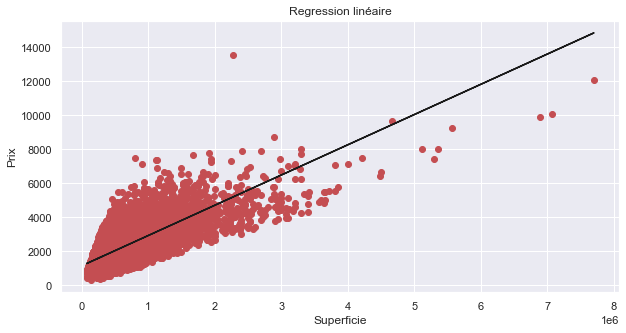

Notre modele consiste  à donner le prix on fonction de la supercifie de la maison 
Mais notre modele n'est performante donc on a pas uen bonne regression linéare


In [142]:
plt.scatter(x,y,color="r")
plt.title("Regression linéaire")
plt.ylabel("Prix")
plt.xlabel("Superficie")
plt.plot(x,model.predict(x),color="k")
plt.show()
print("Notre modele consiste  à donner le prix on fonction de la supercifie de la maison \nMais notre modele n'est performante donc on a pas uen bonne regression linéare")

In [143]:
house.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Age_House
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63


6. Appliquez la régression linéaire multiple et comparez-la au modèle linéaire.

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
X=house[["price","floors"]] # 
Y=house["sqft_living"].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
 #testing our model’s performance




In [146]:
Model=LinearRegression()   # M=Nous construsons un 
Model.fit(X,Y)  #fitting the training data



LinearRegression()

In [147]:
predicted=Model.predict(X_test) # on test la performance de notre modele


print("MSE", mean_squared_error(Y_test,predicted))
print("R carré", metrics.r2_score(Y_test,predicted))
print(f"Le score de perfomance :{Model.score(X,Y) *100}")


MSE 394232.02867146384
R carré 0.5353520734878603
Le score de perfomance :52.51441940702751


In [154]:
aug_score= (Model.score(X,Y) -model.score(x,y))*100

print (f"le modele de machine learning lineare  et moins performant \nque celui de machine learning multiple car on une augmentation de score  de  {aug_score} %")



le modele de machine learning lineare  et moins performant 
que celui de machine learning multiple car on une augmentation de score  de  3.2391201824687688 %


In [157]:
print("Les info sur motre 2ime modele")
x2 = sm.add_constant(X)
ols = sm.OLS(Y, x2)
est = ols.fit()
est.summary()


Les info sur motre 2ime modele


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 1.195e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:30:31   Log-Likelihood:            -1.7008e+05
No. Observations:               21613   AIC:                         3.402e+05
Df Residuals:                   21610   BIC:                         3.402e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        723.3019     13.113     55.158      0.000     697.599     749.005
price          0.0016   1.21e-05    134.897      0.000       0.002       0.002
floors       316.2426      8.250     38.334      0.000     300.073     332.412
==============================================================================
Omnibus:                     2776.375   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8882.925
Skew:                           0.664   Prob(JB):                         0.00
Kurtosis:                       5.846   Cond. No.                     2.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

7. Appliquez la régression polynomiale et comparez-la à la régression linéaire et multilinéaire. 

In [158]:
from sklearn.preprocessing import PolynomialFeatures 

In [160]:
x=house[["price","floors"]] # 
y=house["sqft_living"].values

In [163]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  416640.7715077622
R squared:  0.5170224419302152
